## PROJECT- Face Detection with Haar Cascades
## NAME:MADHANRAJ P
## REG NO:212223220052

✅ Faces found: 1
Eyes detected: 2


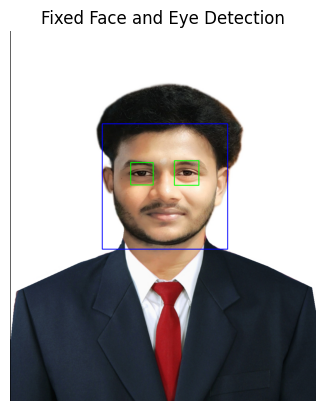

In [7]:
import cv2
import matplotlib.pyplot as plt

# --- Step 1: Load image ---
img = cv2.imread('Madhan..png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- Step 2: Load Haar Cascades ---
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

# --- Step 3: Detect face ---
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

print(f"✅ Faces found: {len(faces)}")

# --- Step 4: Draw rectangles ---
for (x, y, w, h) in faces:
    # Face box (Blue)
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Region of Interest (ROI)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # Detect eyes within ROI (avoid false positives)
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=15, minSize=(30, 30))
    print(f"Eyes detected: {len(eyes)}")

    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

# --- Step 5: Convert and display ---
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("Fixed Face and Eye Detection")
plt.axis('off')
plt.show()
